<a href="https://colab.research.google.com/github/jarminett/Statistical_Learning_II/blob/main/BackPropagation/BackPropagation_0710082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD GALILEO** \\
Instituto de Investigación de Operaciones \\
Posgrado en Análisis y Predicción de Datos \\
Luis Florian, 0710082, sección U \\

**Practica 4 - Back Propagation**
Entrenar un aproximador para la función Xor usando 2 capas intermedias.
* Usar 2 neuronas en la capa anterior a la salida(segunda capa oculta)
* Usar al menos 2(pueden ser más) en la  primera capa oculta.
* Usar activación ReLu en las capas intermedias y  no activación en la salida
Usar numpy.
* Realizar 5 experimentos, en cada experimento(corrida de entrenamiento):
* Inicializar los parámetros aleatoriamente con distribución normal centrada en 0 y std = 0.1
* Retornar la representación intermedia de la segunda capa oculta.
* Graficar las 5 representaciones intermedias(1 por experimento), comparar, comentar y/o concluir.

## **Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## **Neural Network**

In [21]:
class NeuralNetwork:
    def __init__(self,X,Y,lr):
        self.X = X
        self.Y = Y
        self.y_hat = 0
        #50 neuronas ReLU
        self.h1_neurons = 50 
        self.h1_output = 0
        self.std = 1
        self.h1_weights = np.random.normal(0, self.std, size=(2,self.h1_neurons))
        self.h1_bias = np.random.normal(0, self.std, size=(1,self.h1_neurons))
        self.h2_output = 0
        self.h2_weights = np.random.normal(0, self.std, size=(self.h1_neurons,2))
        self.h2_bias = np.random.normal(0, self.std, 2).reshape(1,2)
        self.y_hat = 0
        self.output_weights = np.random.normal(0, self.std, 2).reshape(2,1)
        self.output_bias = np.random.normal(0, self.std, 1).reshape(1,1)
        self.lr = lr
        
        
    def __relu(self,x):
        return x * (x > 0)

    def __relu_prime(self,x):
        return 1 * (x >= 0)
    
    def fit(self):
        for epoch in range(1,50000):
            self.forward_propagation()
            self.back_propagation()
        
    def back_propagation(self):
        error = (self.Y - self.y_hat)
        h2_error_term = error.dot(self.output_weights.T) * self.__relu_prime(self.h2_output)
        h1_error_term = np.matmul(h2_error_term,self.h2_weights.T) * self.__relu_prime(self.h1_output)

        self.output_weights += self.lr * self.h2_output.T.dot(error)
        self.output_bias += self.lr * np.sum(error, axis=0, keepdims=True)
        self.h2_weights += self.lr * self.h1_output.T.dot(h2_error_term)
        self.h2_bias += self.lr * np.sum(h2_error_term, axis=0)
        self.h1_weights += self.lr * self.X.T.dot(h1_error_term)
        self.h1_bias = self.lr * np.sum(h1_error_term, axis=0, keepdims=True)
    
    def forward_propagation(self,X=None):
        if X is None:
            X = self.X
        self.h1_output = self.__relu(X @ self.h1_weights + self.h1_bias) 
        self.h2_output = self.__relu(self.h1_output @ self.h2_weights + self.h2_bias) 
        self.y_hat = (self.h2_output @ self.output_weights  + self.output_bias)
        return self.y_hat

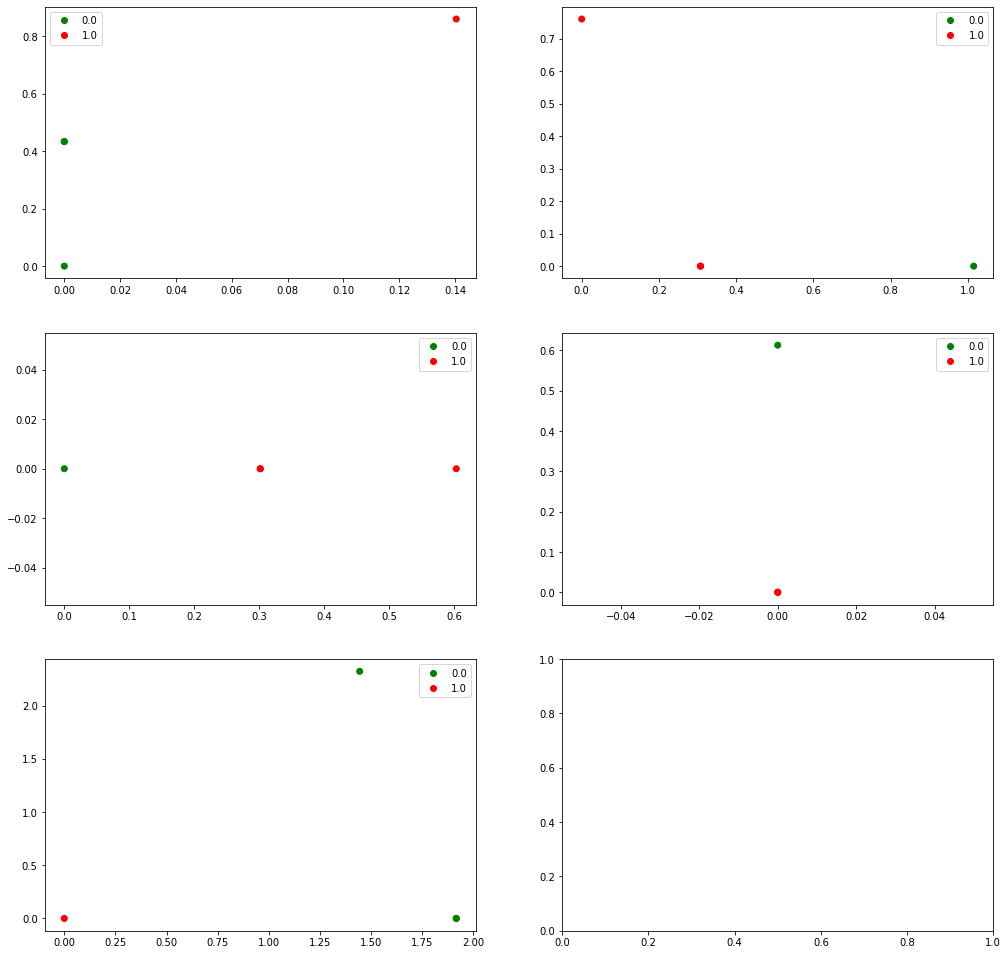

In [75]:
x1 = np.array([1,1,0,0]).reshape(-1,1)
x2 =  np.array([0,0,1,0]).reshape(-1,1)
X = np.hstack((x1,x2))
Y = np.array([[0],[1],[1],[0]])
lr = 0.001

font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

plot_number = 0
f,axes = plt.subplots(3,2,sharex=False, figsize=(17,17))

for i in range(0,5):
    neural_network = NeuralNetwork(X,Y,lr)
    neural_network.fit()

    y_rounded = np.around(neural_network.y_hat)

    colours = ListedColormap(['green','red'])
    classes = list(map(str, np.abs(np.unique(y_rounded))))
    
    axes[i//2, i%2].scatter(neural_network.h2_output[:,0],neural_network.h2_output[:, 1], c=y_rounded.reshape(1,-1)[0].tolist(),cmap=colours)
    axes[i//2, i%2].legend(handles=plot.legend_elements()[0],labels=classes)

f.show()





